In [1]:
#Connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras.utils as image
from PIL import Image

from google.colab import files

In [3]:
base_dir='/content/drive/MyDrive/Cat Classifier'
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'valid')
test_dir =os.path.join(base_dir, 'test')

In [4]:
breed_list = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair',
              'Calico', 'Cornish Rex', 'Egyptian Mau', 'Exotic Shorthair',
              'Maine Coon', 'Norwegian Forest', 'Persian', 'Ragdoll', 'Russian Blue',
              'Scootish Fold', 'Siamese', 'Sphynx', 'Tabby',
              'Tortoiseshell', 'Turkish Van', 'Tuxedo']

train_breed_dir = {}
validation_breed_dir = {}

for breed in breed_list:
    train_breed_dir[breed] = os.path.join(train_dir, breed)
    validation_breed_dir[breed] = os.path.join(validation_dir, breed)

In [5]:
for breed in breed_list:
    train_breed_dir = os.path.join(train_dir, breed)
    validation_breed_dir = os.path.join(validation_dir, breed)
    print('total', breed, 'in training: ', len(os.listdir(train_breed_dir)))
    print('total', breed, 'in validation: ', len(os.listdir(validation_breed_dir)))

total Abyssinian in training:  200
total Abyssinian in validation:  120
total Bengal in training:  200
total Bengal in validation:  126
total Birman in training:  200
total Birman in validation:  133
total Bombay in training:  200
total Bombay in validation:  152
total British Shorthair in training:  200
total British Shorthair in validation:  168
total Calico in training:  200
total Calico in validation:  119
total Cornish Rex in training:  180
total Cornish Rex in validation:  141
total Egyptian Mau in training:  200
total Egyptian Mau in validation:  123
total Exotic Shorthair in training:  88
total Exotic Shorthair in validation:  162
total Maine Coon in training:  200
total Maine Coon in validation:  154
total Norwegian Forest in training:  100
total Norwegian Forest in validation:  133
total Persian in training:  200
total Persian in validation:  132
total Ragdoll in training:  200
total Ragdoll in validation:  143
total Russian Blue in training:  200
total Russian Blue in valida

In [ ]:
# Sınıf isimleri
class_names = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair',
               'Calico','Cornish Rex','Egyptian Mau',
               'Exotic Shorthair','Maine Coon','Norwegian Forest',
               'Persian','Ragdoll','Russian Blue','Scootish Fold',
               'Siamese','Sphynx','Tabby',
               'Tortoiseshell','Turkish Van','Tuxedo']

# Her sınıf için ayrı bir görsel oluşturma
for class_name in class_names:
    fig, ax = plt.subplots(1, 5, figsize=(10, 2))
    for j in range(5):
        img_path = os.path.join(train_dir, class_name, os.listdir(os.path.join(train_dir, class_name))[j])
        img = Image.open(img_path)
        h, w = img.size
        scale_factor = 100 / max(h, w)
        new_h, new_w = int(h * scale_factor), int(w * scale_factor)
        img = img.resize((80, 80)) # Tüm resimleri 100x100 piksel boyutuna getiriyoruz
        ax[j].imshow(np.array(img))
        ax[j].axis('off')
        ax[j].set_title(class_name)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Verileri yeniden boyutlandırmak için ImageDataGenerator nesnesi oluşturuyoruz
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train, validation ve test setleri için veri yükleyicileri oluşturuyoruz
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 3868 images belonging to 21 classes.
Found 2817 images belonging to 21 classes.
Found 2540 images belonging to 21 classes.


In [ ]:
model.evaluate(test_generator)

80/80 [==============================] - 395s 5s/step - loss: 0.5996 - accuracy: 0.9161


[0.5996328592300415, 0.9161417484283447]

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/catbm.h5')

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(21, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_196 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_197 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_198 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# Model derleme
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
# Model eğitimi
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=test_generator,
    verbose=1
)

Epoch 1/30
50/50 [==============================] - 163s 3s/step - loss: 3.0430 - accuracy: 0.0514 - val_loss: 3.0203 - val_accuracy: 0.0815
Epoch 2/30
50/50 [==============================] - 185s 4s/step - loss: 2.9626 - accuracy: 0.1065 - val_loss: 2.8284 - val_accuracy: 0.1697
Epoch 3/30
50/50 [==============================] - 158s 3s/step - loss: 2.7444 - accuracy: 0.1644 - val_loss: 2.7527 - val_accuracy: 0.1665
Epoch 4/30
50/50 [==============================] - 184s 4s/step - loss: 2.6466 - accuracy: 0.1925 - val_loss: 2.6408 - val_accuracy: 0.2043
Epoch 5/30
50/50 [==============================] - 185s 4s/step - loss: 2.5802 - accuracy: 0.2113 - val_loss: 2.6298 - val_accuracy: 0.1941
Epoch 6/30
50/50 [==============================] - 189s 4s/step - loss: 2.4361 - accuracy: 0.2525 - val_loss: 2.5039 - val_accuracy: 0.2417
Epoch 7/30
50/50 [==============================] - 182s 4s/step - loss: 2.3641 - accuracy: 0.2637 - val_loss: 2.3987 - val_accuracy: 0.2752
Epoch 8/30
50

80/80 [==============================] - 70s 863ms/step - loss: 0.5996 - accuracy: 0.9161


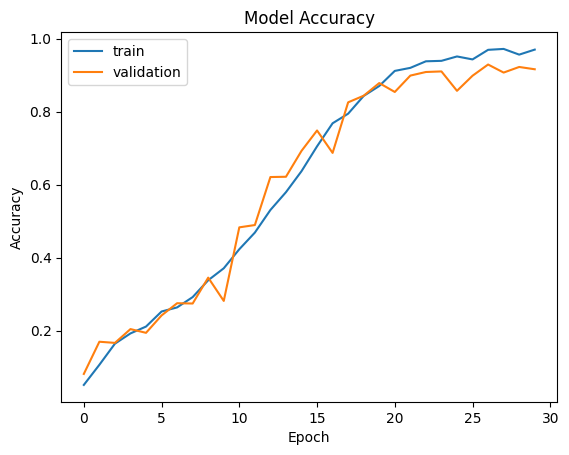

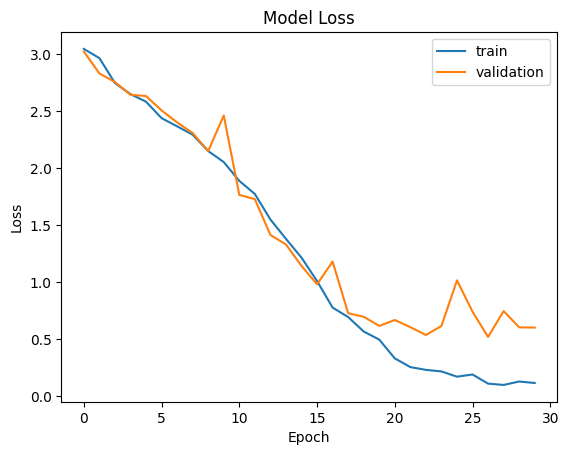

Test Loss: 59.96%
Test Accuracy: 91.61%


In [ ]:
# Test veri seti üzerinde tahmin yapma
test_loss, test_accuracy = model.evaluate(test_generator)


# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

print("Test Loss: {:.2f}%".format(test_loss * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

<ipython-input-68-296eca207e9f>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, steps=len(test_generator))


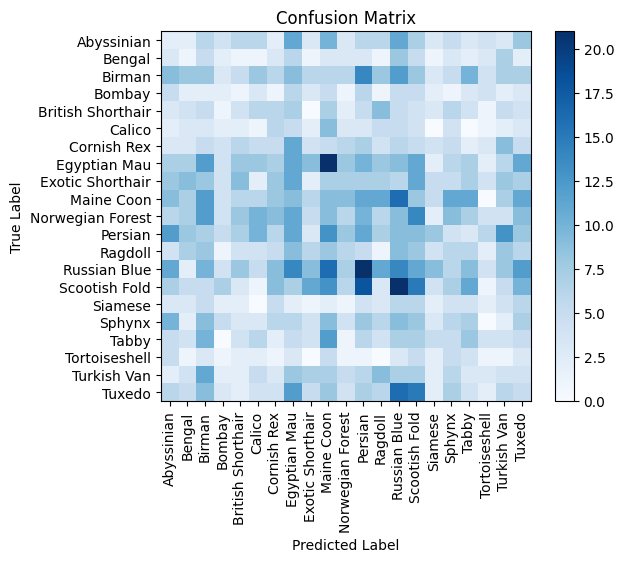

In [ ]:
from sklearn.metrics import confusion_matrix

# Modeli kullanarak tahminler yapın
Y_pred = model.predict_generator(test_generator, steps=len(test_generator))

# Tahminleri sınıf etiketlerine dönüştürün
y_pred = np.argmax(Y_pred, axis=1)

# Gerçek sınıf değerlerini yükleyin
y_true = test_generator.classes

# Sınıf isimlerini yükleyin
class_names = list(test_generator.class_indices.keys())

# Confusion matrix oluşturun
cm = confusion_matrix(y_true, y_pred)

# Matrisi görselleştirin
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Test veri kümesi üzerinde tahminler yapma
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Gerçek sınıfları alıp confusion matrix oluşturma
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred)

# Sensitivity ve Specificity hesaplama
sensitivity = []
specificity = []
for i in range(21):
    TP = cm[i,i]
    FN = np.sum(cm[i,:]) - TP
    FP = np.sum(cm[:,i]) - TP
    TN = np.sum(cm) - TP - FN - FP
    sensitivity.append(TP / (TP + FN))
    specificity.append(TN / (TN + FP))

print("Sensitivity (Hassasiyet): ", sensitivity)
print("Specificity (Özgüllük): ", specificity)

80/80 [==============================] - 60s 733ms/step
Sensitivity (Hassasiyet):  [0.06306306306306306, 0.0, 0.03289473684210526, 0.031746031746031744, 0.02197802197802198, 0.06153846153846154, 0.056074766355140186, 0.05172413793103448, 0.04225352112676056, 0.10227272727272728, 0.024844720496894408, 0.06547619047619048, 0.03418803418803419, 0.055, 0.05917159763313609, 0.04477611940298507, 0.03418803418803419, 0.046296296296296294, 0.02040816326530612, 0.056074766355140186, 0.045454545454545456]
Specificity (Özgüllük):  [0.9538904899135446, 0.970113085621971, 0.9346733668341709, 0.9749697214372225, 0.9640669661086158, 0.9652525252525253, 0.957665433621044, 0.9273034657650042, 0.9624687239366139, 0.9289340101522843, 0.9688944934846574, 0.9312816188870152, 0.9517127527858027, 0.9123931623931624, 0.9333614508646141, 0.9725030327537404, 0.9479983491539414, 0.9523026315789473, 0.9783219590525893, 0.9654747225647349, 0.9418604651162791]


In [ ]:
'''
uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    plt.imshow(img)

    plt.show()

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)

    for i in classes:
        if classes[0][0]==1:
            print('It is an Abyssian Cat')
        elif classes[0][1]==1:
            print('It is a Bengal Cat')
        elif classes[0][2]==1:
            print('It is a Birman Cat')
        elif classes[0][3]==1:
            print('It is a Bombay Cat')
        elif classes[0][4]==1:
            print('It is a British Shorthair Cat')
        elif classes[0][5]==1:
            print('It is a Calico')
        elif classes[0][6]==1:
            print('It is a Cornish Rex')
        elif classes[0][7]==1:
            print('It is a Egyptian Mau')
        elif classes[0][8]==1:
            print('It is Exotic Shorthair')
        elif classes[0][9]==1:
            print('It is a Maine Coon')
        elif classes[0][10]==1:
            print('It is a Norwegian Forest')
        elif classes[0][11]==1:
            print('It is a Persian')
        elif classes[0][12]==1:
            print('It is a Ragdoll')
        elif classes[0][13]==1:
            print('It is a Russian Blue')
        elif classes[0][14]==1:
            print('It is a Scootish Fold')
        elif classes[0][15]==1:
            print('It is a Siamese')
        elif classes[0][16]==1:
            print('It is Sphynx')
        elif classes[0][17]==1:
            print('It is a Tabby')
        elif classes[0][18]==1:
            print('It is a Tortoiseshell')
        elif classes[0][19]==1:
            print('It is a Turkish Van')
        elif classes[0][20]==1:
            print('It is a Tuxedo') '''

Saving Turkish Van (32).jpg to Turkish Van (32).jpg


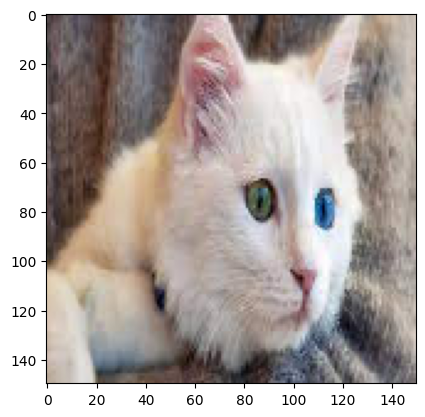

1/1 [==============================] - 0s 96ms/step
Model, bu kedinin ırkını tahmin etti:  Turkish Van


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    plt.imshow(img)

    plt.show()

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    for i in range(len(classes[0])):
        if classes[0][i]==1:
            print('Model, bu kedinin ırkını tahmin etti: ', class_names[i])
            break


In [ ]:
# Serialize model to JSON
model_json = model.to_json()
with open("catbm.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
model.save_weights("catbm.h5")


In [ ]:
!pip install h5py
import tensorflow as tf
# load json and create model
json_file = open('catbm.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("catbm.h5")
print("Loaded model from disk")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_196 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_197 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_198 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.save('catbm.h5')

In [ ]:
!cp catbm.h5 /content/drive/MyDrive/